<h1>Linear Regression Model Development</h1>
<p>This project will load the Boston housing data from SKit learn and develop a linear regression model aswell as implement the Gradient Descent algorithm to the the hyper-parameters <i>w</i> and <i>b</i> for the model. Besides that there will also be feature normalization through z-score.</p>
<p>Throughout this project  all the mathematical concepts used to sucessfuly develop the model will be available and displayed accordingly.</p>

<h3>Dataset</h3>

In [3]:
import pandas as pd
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

x_train = boston.data
y_train = boston.target


c:\Users\Henrique\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

In [4]:
# print x_train
print("Type of x_train:",type(x_train))
print("First element of x_train is:\n", x_train[:1]) 

Type of x_train: <class 'numpy.ndarray'>
First element of x_train is:
 [[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]


In [5]:
# print y_train
print("Type of y_train:",type(y_train))
print("First element of y_train is:\n", y_train[:1])  

Type of y_train: <class 'numpy.ndarray'>
First element of y_train is:
 [24.]


Check the dimensions of the variables

In [6]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))
print ('Number of features (n):', x_train.shape[1])

The shape of x_train is: (506, 13)
The shape of y_train is:  (506,)
Number of training examples (m): 506
Number of features (n): 13


<h3>Visualize the data</h3>

By converting the np array into a dataset using pandas, we can then plug it into matplotlib to generate a matrix plot in which the linear nature of the relationship between variables becomes more apperant

In [7]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [8]:
def plot_matrix_xtrain():
    # Convert the dataset to a Pandas dataframe
    df = pd.DataFrame(boston.data, columns=boston.feature_names)

    # Add the target variable to the dataframe
    df['MEDV'] = boston.target

    # Create a scatter plot matrix
    scatter_matrix(df.iloc[:, 0:5], figsize=(10, 10))
    plt.show()

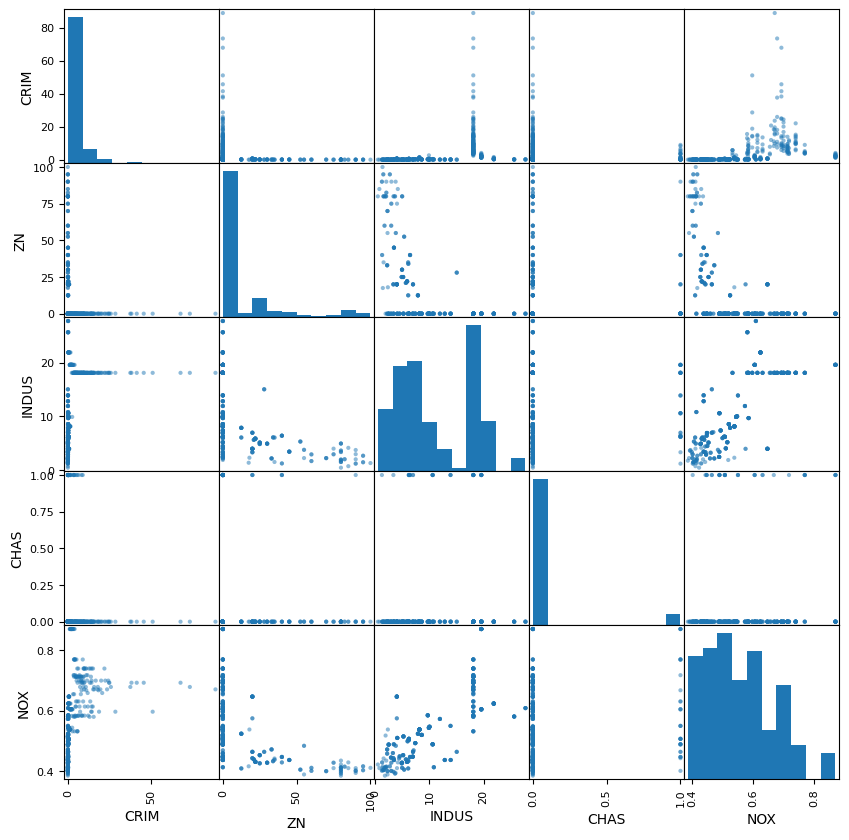

In [9]:
plot_matrix_xtrain()

<h3>Linear Regression</h3>

The model function for linear regression, which is a function that maps from `x` (vector of variables) to `y` (price) is represented as 
    $$f_{w,b}(x) = wx + b$$

To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
- $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
- The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.

To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, a method called **gradient descent** is used. 
- With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.


- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city)

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [10]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# data is stored in numpy array/matrix
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")

print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")


X Shape: (506, 13), X Type:<class 'numpy.ndarray'>)
y Shape: (506,), y Type:<class 'numpy.ndarray'>)


In [14]:
b_init = 0
w_init = np.zeros(13)

In [21]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [33]:
# Compute and display cost using initial parameters. 
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at initial w : {cost}')

Cost at initial w : 296.0734584980236


#### Gradient descent
the gradient descent algorithm for a univariate model is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value



Since we're working with muyltiple variables, the $x$ and $w$ variables need to be treated as vectors. As such, there should be a matrix multiplication operation instead of scalar multiplication going further.

In [24]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [26]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -22.532806324110698
dj_dw at initial w,b: 
 [-5.07650270e+01 -3.33216996e+02 -2.20482372e+02 -1.96719368e+00
 -1.20443239e+01 -1.46095015e+02 -1.44778881e+03 -9.03436248e+01
 -1.84674111e+02 -8.47390830e+03 -4.05764289e+02 -8.31630337e+03
 -2.36757231e+02]


In [27]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [28]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")




Iteration    0: Cost   229.88   
Iteration  100: Cost    43.08   
Iteration  200: Cost    40.52   
Iteration  300: Cost    40.10   
Iteration  400: Cost    39.89   
Iteration  500: Cost    39.71   
Iteration  600: Cost    39.54   
Iteration  700: Cost    39.38   
Iteration  800: Cost    39.22   
Iteration  900: Cost    39.07   
b,w found by gradient descent: 0.00,[-5.33033133e-03  2.95365298e-02 -3.88381267e-03  2.04809858e-04
  1.33811203e-04  4.77033559e-03  2.46673744e-03  2.39206443e-03
 -1.45856693e-03 -5.40614428e-05  4.15790260e-03  6.02799889e-02
 -1.16495016e-02] 
prediction: 24.64, target value: 24.0
prediction: 24.09, target value: 21.6
prediction: 23.86, target value: 34.7
prediction: 23.97, target value: 33.4
prediction: 24.10, target value: 36.2
prediction: 23.94, target value: 28.7
prediction: 24.29, target value: 22.9
prediction: 24.36, target value: 27.1
prediction: 23.62, target value: 16.5
prediction: 23.75, target value: 18.9
prediction: 24.08, target value: 15.0
pr

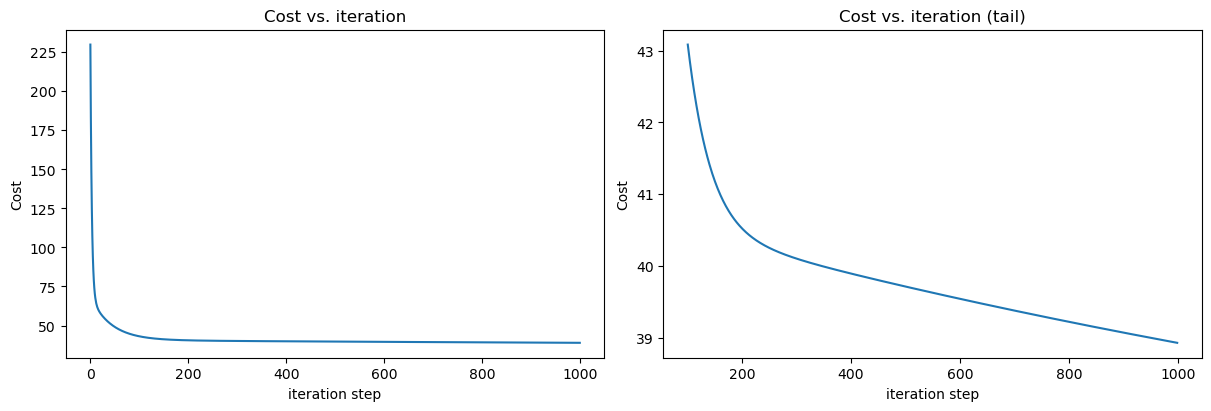

In [29]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [30]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [31]:
predict(x_train[0], w_final, b_final)

24.63841507053606

In [32]:
y_train[0]

24.0